In [1]:
import numpy as np
import os
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
np.random.seed(0)

In [2]:
# # create csv of all images
# p = "Places_Data/train_val"

# CSVs = []

# for city in tqdm.tqdm(os.listdir("../"+p)):

#     dfs = []

#     for folder in ['query', 'database']:

#         path = f"{p}/{city}/{folder}"

#         csv = pd.read_csv(f"../{path}/postprocessed.csv",index_col = 1)

#         raw = pd.read_csv(f"../{path}/raw.csv",index_col = 1)

#         seq = pd.read_csv(f"../{path}/seq_info.csv",index_col = 1)

#         csv = csv.merge(raw["pano"].to_frame(),left_index=True,right_index=True).merge(seq,left_index=True,right_index=True)

#         csv["Path"] = path

#         csv["City"] = city

#         csv = csv.reset_index()

#         dfs.append(csv)

    
#     df_seq = pd.concat(dfs)
#     sequences = df_seq["sequence_key"].unique()

#     unique_dicretion = lambda key: len(df_seq.loc[df_seq["sequence_key"]==key,"pano"].unique()) == 1
#     vals = {sequence: unique_dicretion(sequence) for sequence in sequences}

#     df_seq["change_in_seq"] = df_seq["sequence_key"].map(vals)

  
#     CSVs.append(df_seq)

# df = pd.concat(CSVs)
# df.index = range(len(df))

# df["change_in_seq"] = np.logical_not(df["change_in_seq"])
# df.to_csv("prelim.csv")


In [3]:
df = pd.read_csv("prelim_csv/prelim.csv",index_col = 0)

In [4]:
df.loc[df["change_in_seq"]==True,"sequence_key"].unique()

array(['autfzW8U5zbBmtmHzCkbJA'], dtype=object)

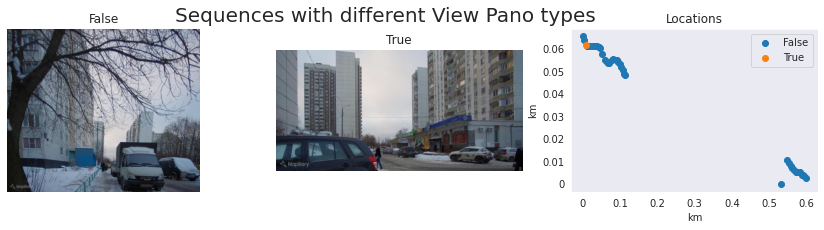

In [5]:
def join_paths(path):
    return "../" +path[0] + "/images/" + path[1] + ".jpg"

def plot_keys(n):

    fig, ax = plt.subplots(n,3,figsize=(15,3*n))

    keys = ['autfzW8U5zbBmtmHzCkbJA']

    for i in range(n):

        key = keys[i]

        seq = df[df["sequence_key"]==key].copy()
        dirs = seq["pano"].unique()
        img1 = join_paths(seq.loc[seq["pano"]== dirs[0],["Path","key"]].iloc[0].values)
        img2 = join_paths(seq.loc[seq["pano"]== dirs[1],["Path","key"]].iloc[0].values) 

        ax[0].imshow(plt.imread(img1))
        ax[0].axis('off')
        ax[0].set_title(dirs[0])
        ax[1].imshow(plt.imread(img2))
        ax[1].axis('off')
        ax[1].set_title(dirs[1])

        seq.loc[:,"easting"]-=seq["easting"].min()

        seq.loc[:,"northing"]-=seq["northing"].min()
        
        mask1 = seq["pano"]== dirs[0]
        mask2 = seq["pano"]== dirs[1]


        ax[2].scatter(seq.loc[mask1,"easting"],seq.loc[mask1,"northing"],label=dirs[0])
        ax[2].scatter(seq.loc[mask2,"easting"],seq.loc[mask2,"northing"],label=dirs[1])
        ax[2].legend()
        ax[2].set_title("Locations")
        m2km = lambda x, _: f'{x/1000:g}'
        ax[2].xaxis.set_major_formatter(m2km)
        ax[2].yaxis.set_major_formatter(m2km)
        ax[2].set_xlabel("km")
        ax[2].set_ylabel("km")


    plt.suptitle("Sequences with different View Pano types",fontsize = 20)
    plt.savefig("Imgs/Sequences with different View Pano types.jpg")
    plt.show()

plot_keys(1)

In [6]:
# drop this sequence
df = df.loc[df["change_in_seq"]==False]

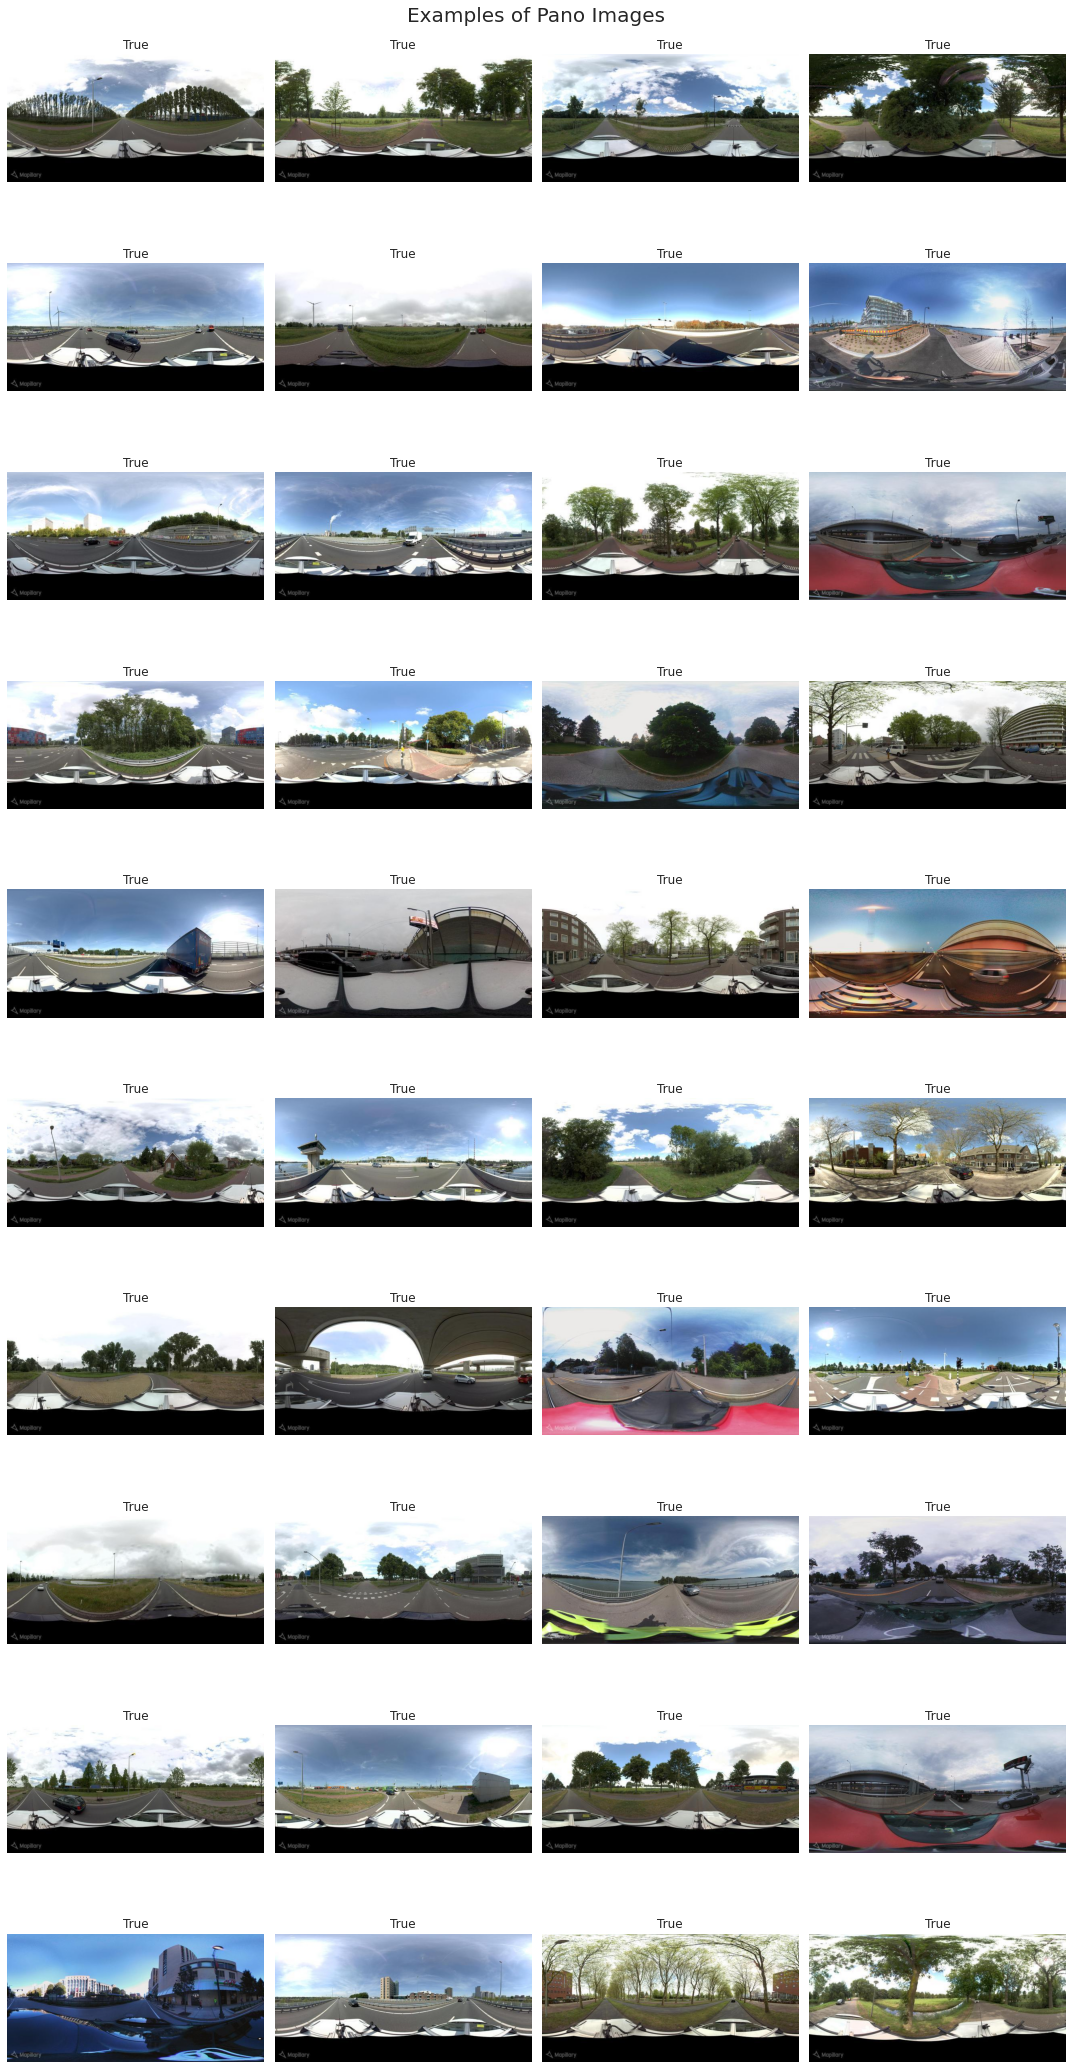

In [7]:
n_rows, n_cols = 10,4
fig, ax = plt.subplots(n_rows,n_cols,figsize=(15,3*n_rows))
indices = np.random.choice(df[df["pano"]==True].index.values,n_rows*n_cols,replace=False)

images = df.loc[indices]

ax = ax.flatten()

for i in range(n_rows*n_cols):
    
    img = images.iloc[i]
    ax[i].imshow(plt.imread(join_paths(img[["Path","key"]])))
    ax[i].axis('off')
    ax[i].set_title(img["pano"])

plt.suptitle("Examples of Pano Images",fontsize=20)
plt.savefig("Imgs/Examples of Pano Images.jpg")
plt.tight_layout()
plt.show()

In [8]:
df.value_counts("pano")

pano
False    1447823
True       16436
dtype: int64

In [9]:
agg = []
counts = df.value_counts(["City","pano"])
for city in df["City"].unique():

    row = counts.loc[city].copy().to_frame().T
    
    if True not in row.columns:
        row[True]=0
    row["n_images"]= row.sum(axis=1)
    row.index = [city]
    agg.append(row)

city = pd.concat(agg).rename(columns={False:"Normal",True:"Pano"})
city.index.names = ["City"]
city

pano,Normal,Pano,n_images
City,,,
berlin,70836,326,71162
bangkok,114745,0,114745
boston,20258,490,20748
austin,42684,0,42684
toronto,20141,0,20141
paris,17851,132,17983
cph,19115,81,19196
melbourne,189945,0,189945
helsinki,47164,1312,48476


In [10]:
city["Pano"].sum() * 0.1

1643.6000000000001

In [11]:
city[city["Pano"]>0]

pano,Normal,Pano,n_images
City,,,
berlin,70836,326,71162
boston,20258,490,20748
paris,17851,132,17983
cph,19115,81,19196
helsinki,47164,1312,48476
ottawa,122794,479,123273
budapest,199060,61,199121
moscow,249111,224,249335
amsterdam,7196,12236,19432


In [12]:
val_citys = ["berlin","helsinki"]
test_citys = ["boston","ottawa","tokyo","phoenix"]
train_citys = city.drop(index=val_citys+ test_citys).index.values
city.loc[val_citys+test_citys,"Pano"].sum()

3359

In [13]:
train_df_all = df.loc[df["City"].apply(lambda x: x in train_citys)]
test_df_all = df.loc[df["City"].apply(lambda x: x in test_citys)]
val_df_all = df.loc[df["City"].apply(lambda x: x in val_citys)]

In [14]:
train_df_all.value_counts("pano")

pano
False    969926
True      13077
dtype: int64

In [15]:
val_df_all.value_counts("pano")

pano
False    118000
True       1638
dtype: int64

In [16]:
test_df_all.value_counts("pano")


pano
False    359897
True       1721
dtype: int64

In [17]:
def drop_n_forward(df,n):

    df = df.copy()
    indeces = df[df["pano"] == False].index
    keep = np.random.choice(indeces,len(indeces)-n,replace = False)
    indices_to_keep = np.concatenate([keep, df[df["pano"] == True].index])
    return df.loc[indices_to_keep].copy()
train_df = drop_n_forward(train_df_all,950000)
val_df = drop_n_forward(val_df_all,115000)
test_df = drop_n_forward(test_df_all,356800)


In [18]:
# shuffle ds 
train_df = train_df.sample(frac = 1, random_state= 1)
val_df = val_df.sample(frac = 1, random_state= 1)


train_df["ds_type"] = "train"
val_df["ds_type"] = "val"
test_df["ds_type"] = "test"

df = pd.concat([train_df,val_df,test_df])
df.drop(columns=["Unnamed: 0_x","unique_cluster","view_direction","Unnamed: 0_y","frame_number","control_panel","night"],inplace=True)
df.index = range(len(df))
df.to_csv("pano_data.csv")

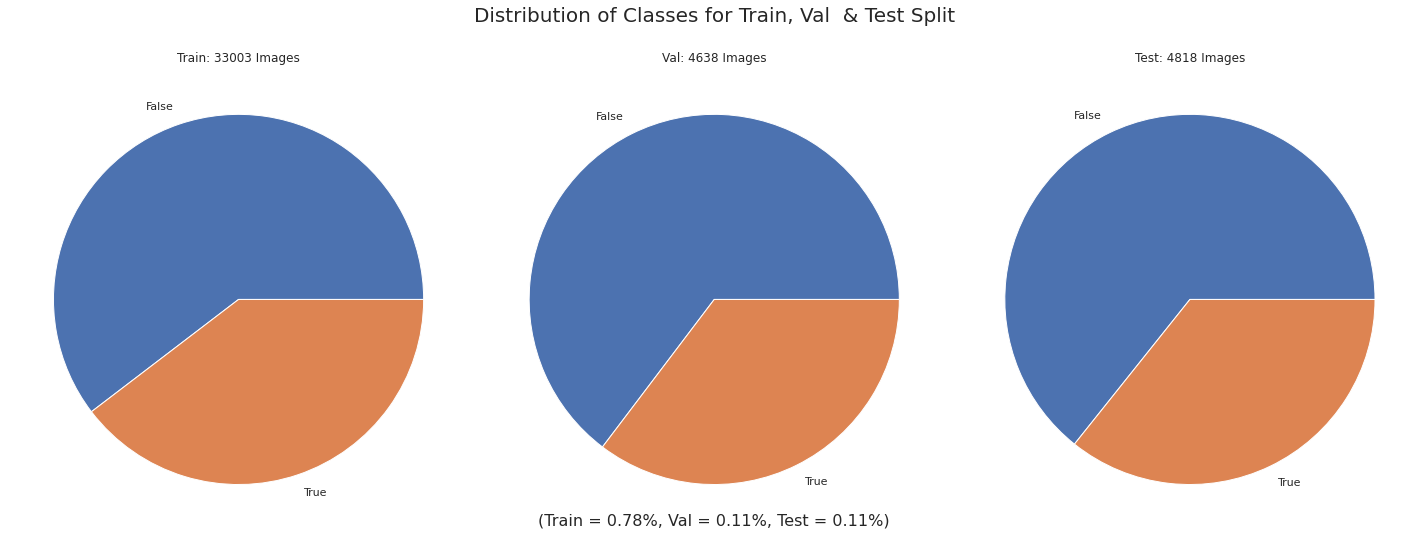

In [19]:
sns.set_theme()
def plot_pie(df,ax):

    x = df["pano"].value_counts()

    ax.pie(x.values,labels = x.index )

fig,ax = plt.subplots(1,3,figsize=[20,8])

ax[0].title.set_text(f'Train: {len(train_df)} Images')
ax[1].title.set_text(f'Val: {len(val_df)} Images')
ax[2].title.set_text(f'Test: {len(test_df)} Images')


plot_pie(train_df,ax[0])
plot_pie(val_df,ax[1])
plot_pie(test_df,ax[2])
plt.suptitle(f"Distribution of Classes for Train, Val  & Test Split",fontsize=20)
plt.tight_layout()
plt.figtext(0.5, 0.08, f"(Train = {len(train_df)/len(df):.2f}%, Val = {len(val_df)/len(df):.2f}%, Test = {len(test_df)/len(df):.2f}%)", wrap=True, horizontalalignment='center', fontsize=16)
plt.savefig("Imgs/Training Split.jpg")
plt.show()

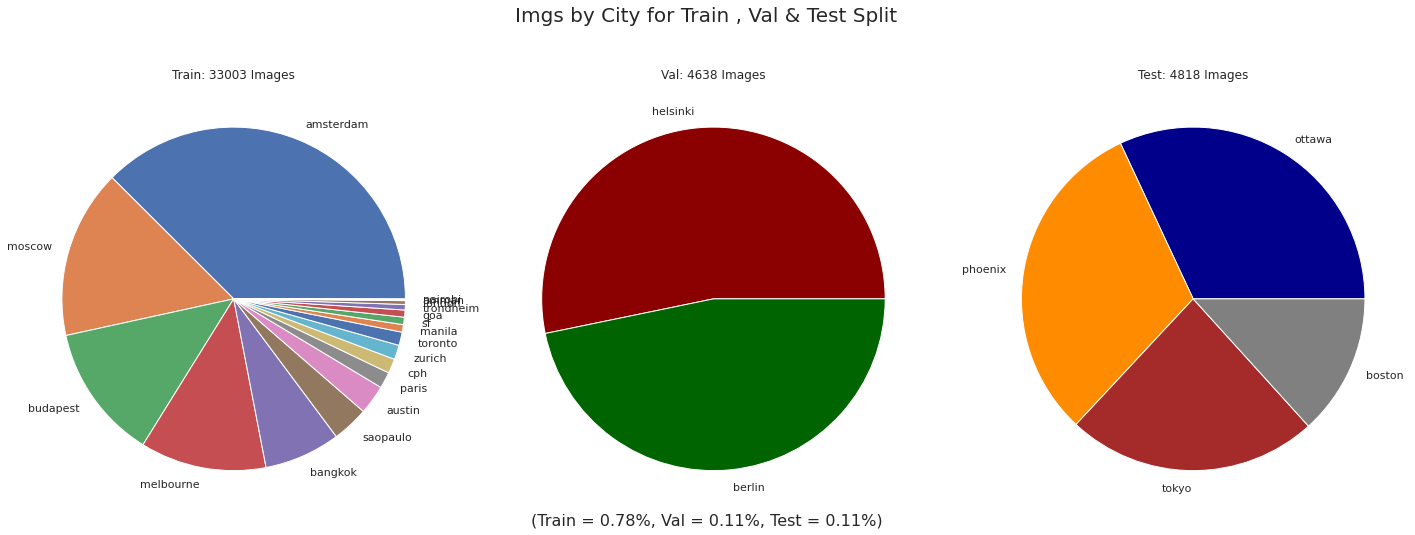

In [20]:
def plot_pie(df,ax,colors = None):

    x = df["City"].value_counts()

    ax.pie(x.values,labels = x.index ,colors = colors)

fig,ax = plt.subplots(1,3,figsize=[20,8])

ax[0].title.set_text(f'Train: {len(train_df)} Images')
ax[1].title.set_text(f'Val: {len(val_df)} Images')
ax[2].title.set_text(f'Test: {len(test_df)} Images')


plot_pie(train_df,ax[0])
plot_pie(val_df,ax[1],colors=["darkred","darkgreen"])
plot_pie(test_df,ax[2],colors=["darkblue","darkorange","brown","grey"])
plt.suptitle(f"Imgs by City for Train , Val & Test Split", fontsize=20)
plt.figtext(0.5, 0.08, f"(Train = {len(train_df)/len(df):.2f}%, Val = {len(val_df)/len(df):.2f}%, Test = {len(test_df)/len(df):.2f}%)", wrap=True, horizontalalignment='center', fontsize=16)
plt.tight_layout()
plt.savefig("Imgs/Citys Split.jpg")
plt.show()